## About Dataset
- Context
* There's a story behind every dataset and here's your opportunity to share yours.

- Content

## Attribute Information:

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
* Weather data observations
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8
* FWI Components
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# we need to load the dataset
df1 = pd.read_csv("/Users/anand/Desktop/Machine Learning/List_of_DataSet/Bejaia Region ForestFire Dataset.csv")
df2 = pd.read_csv("/Users/anand/Desktop/Machine Learning/List_of_DataSet/Sidi-Bel Abbes Region ForestFire Dataset.csv")
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()
# we need to check if the data type is according the name of the dataset whether it is integer , object or float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


## Data cleaning

In [4]:
# to check the misssing value 
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [5]:
# to check only the specific row 
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
# Here am converting the 2 dataset which has the 2 region as 0 and 1 for the difference 
df.loc[:122 , 'Region'] = 0
df.loc[122: , 'Region'] = 1

In [7]:
df[['Region']] = df[['Region']].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.dropna().reset_index(drop = True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


In [14]:
import pandas as pd

# Step 1: Remove unwanted characters and keep only the first valid float from each entry
df['DC'] = df['DC'].astype(str).str.extract(r'([\d.]+)').astype(float)
df['FWI'] = df['FWI'].astype(str).str.extract(r'([\d.]+)').astype(float)


In [15]:
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


## EDA 

In [17]:
# drop the day , month and year
df_copy = df.drop(['day' , 'month' , 'year'],axis = 1)

In [18]:
df_copy.columns = df_copy.columns.str.strip()

In [19]:
df_copy['Classes'] = df_copy['Classes'].astype(str).str.strip().str.lower()
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [20]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [21]:
df_copy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
df_copy.to_csv("/Users/anand/Desktop/Machine Learning/List_of_DataSet/Algerian_forest_fires_Cleaned_Dataset.csv", index=False)


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_13946/3608362949.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


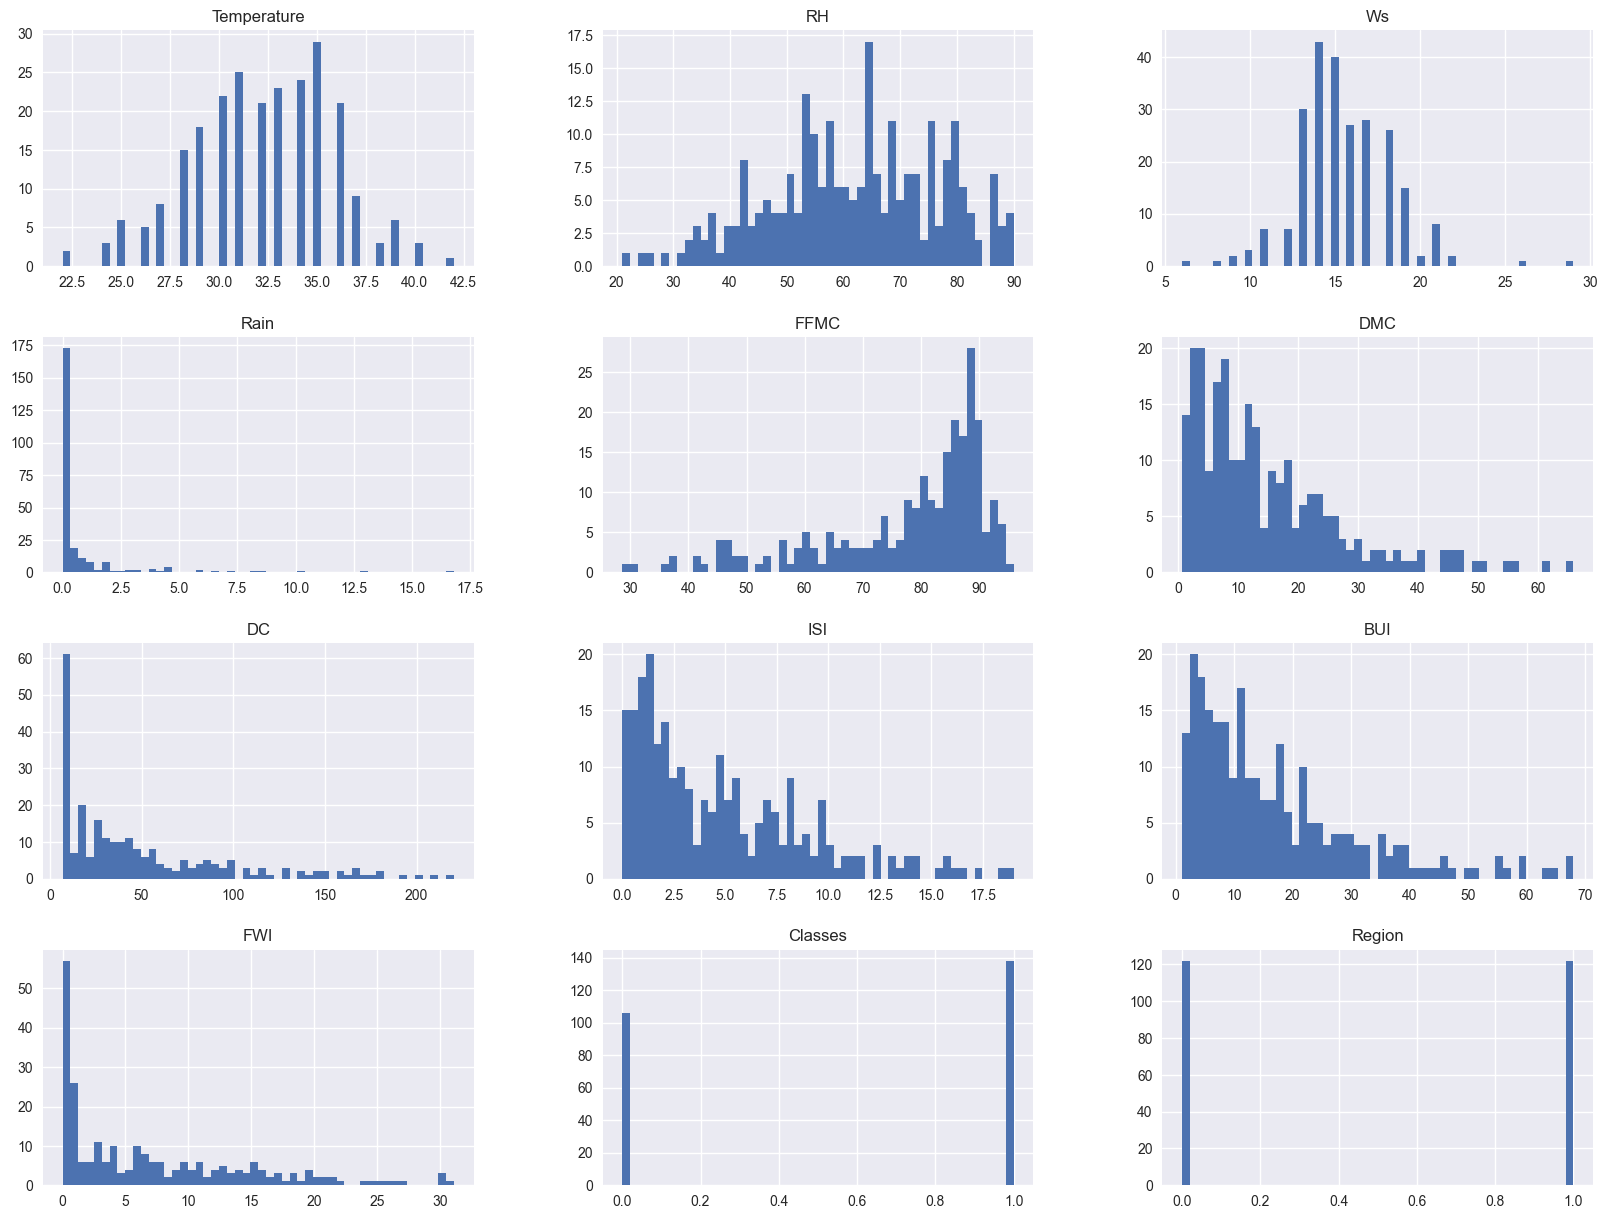

In [22]:
# plot the density plot
plt.style.use('seaborn')
df_copy.hist(bins = 50 , figsize=(20,15))
plt.show()

In [23]:
# percentage of the pie charts
percentage = df_copy['Classes'].value_counts(normalize = True)*100

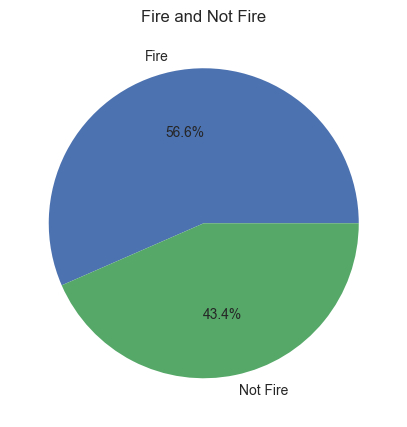

In [24]:
# creating the pie charts for the fire and not fire 
Labels = ['Fire' , 'Not Fire']
plt.figure(figsize=(5,20))
plt.pie(percentage , labels=Labels , autopct='%1.1f%%')
plt.title('Fire and Not Fire')
plt.show()

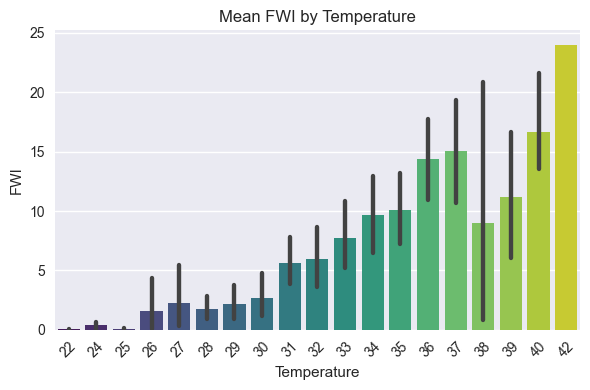

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


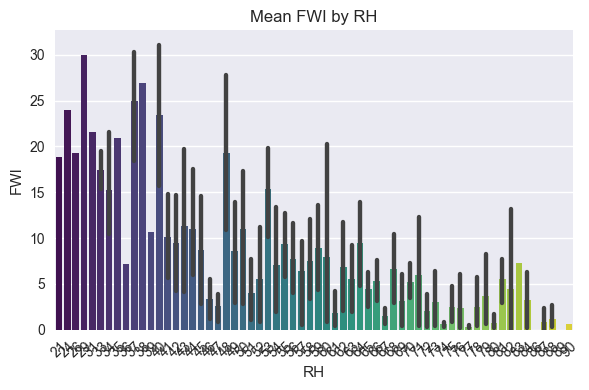

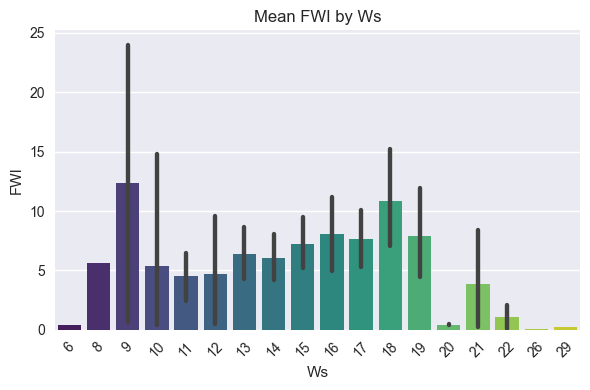

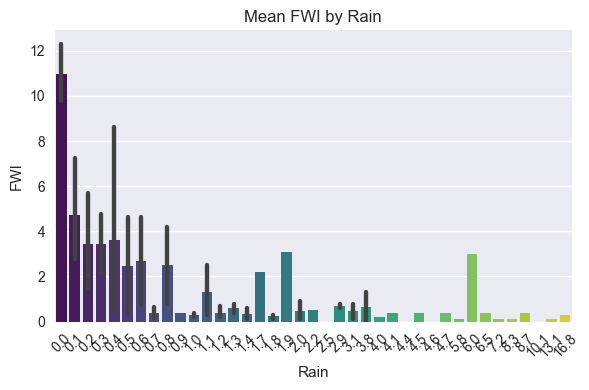

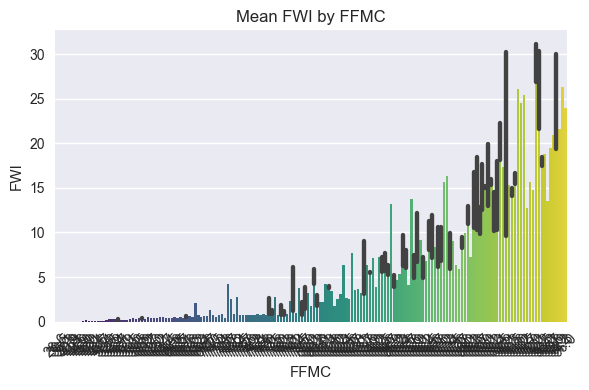

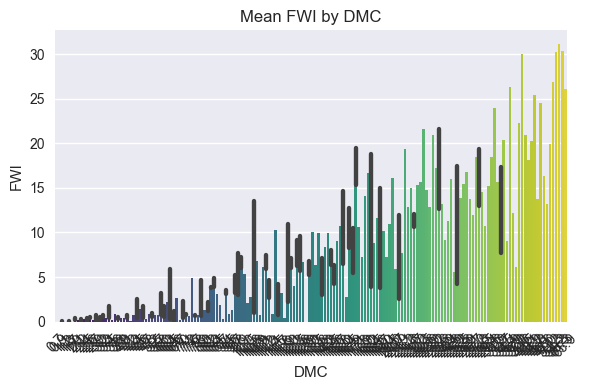

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


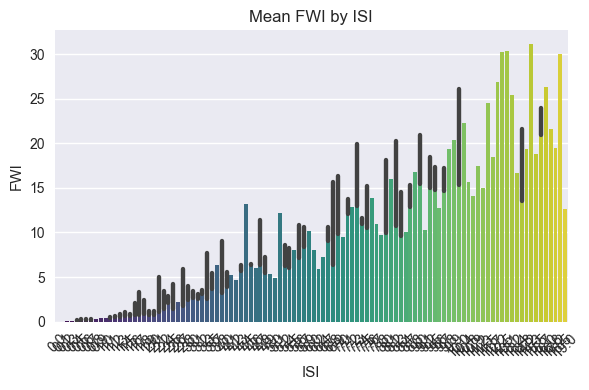

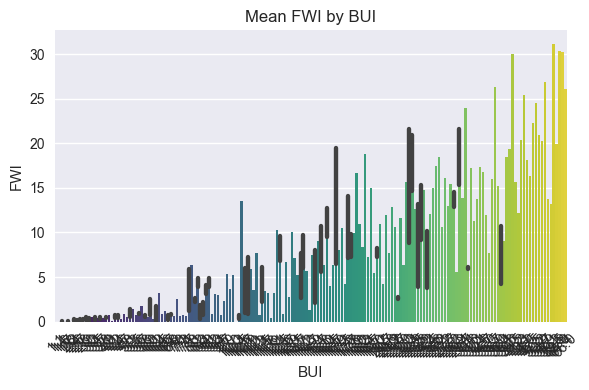

In [25]:
independent_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

for feature in independent_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df_copy, x=feature, y='FWI', estimator='mean', palette='viridis')
    plt.title(f"Mean FWI by {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

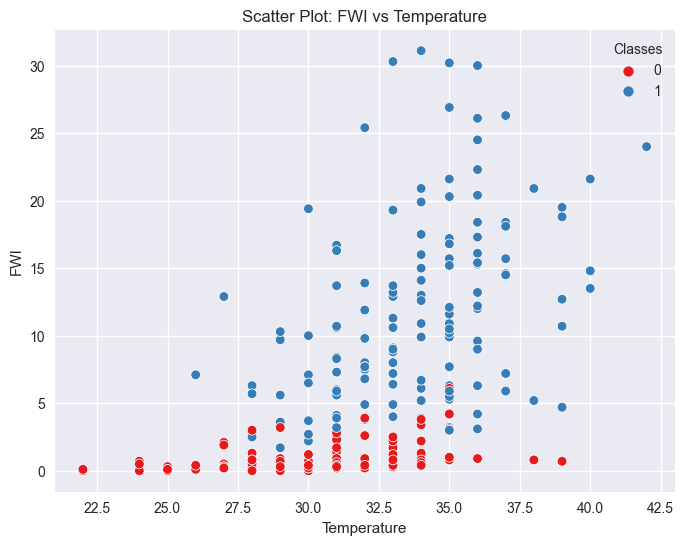

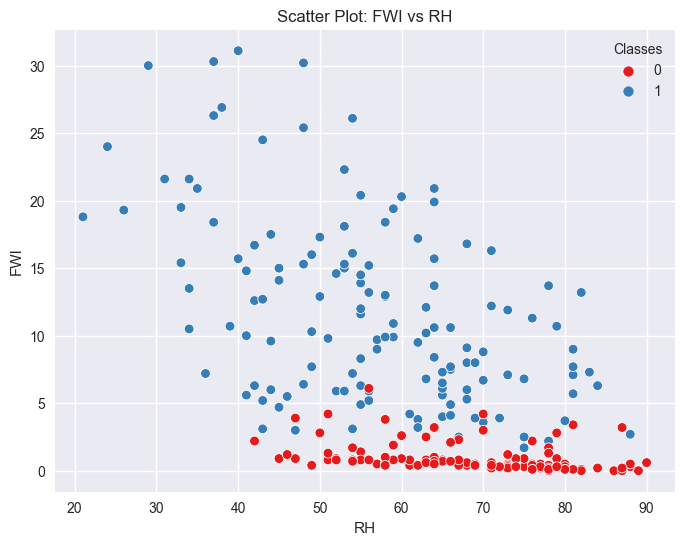

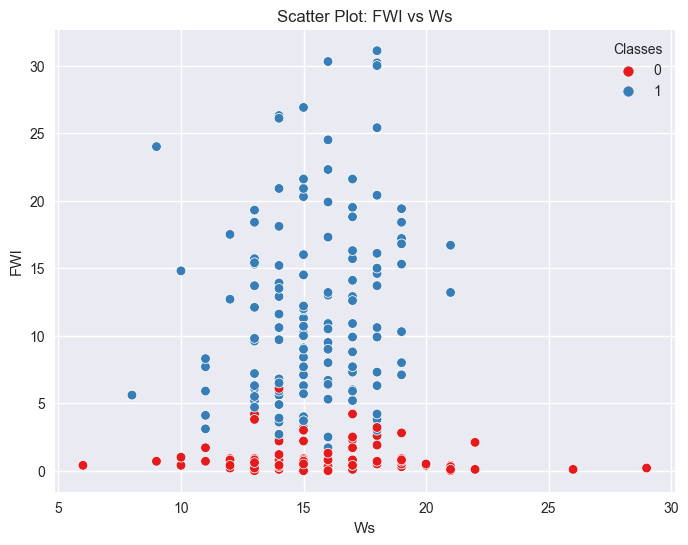

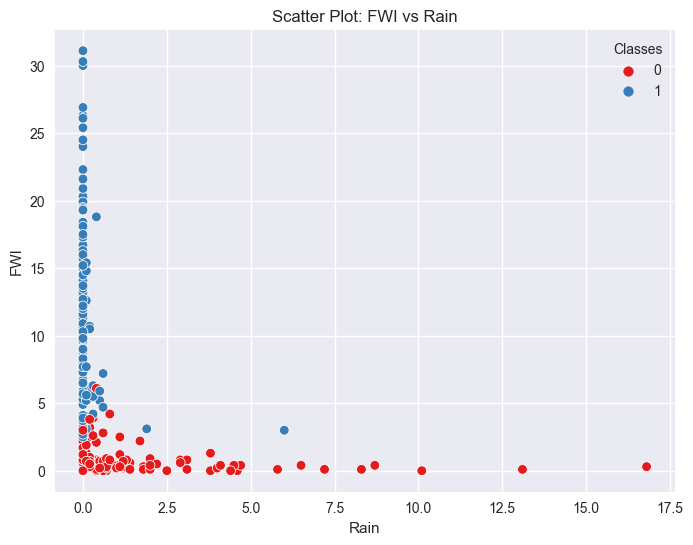

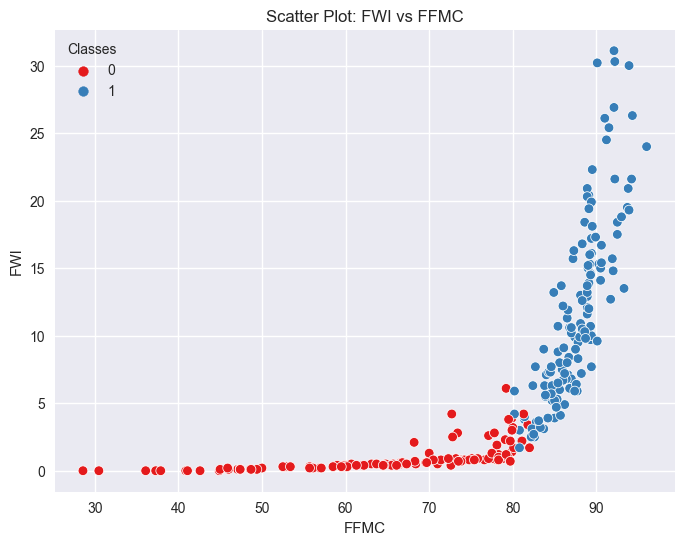

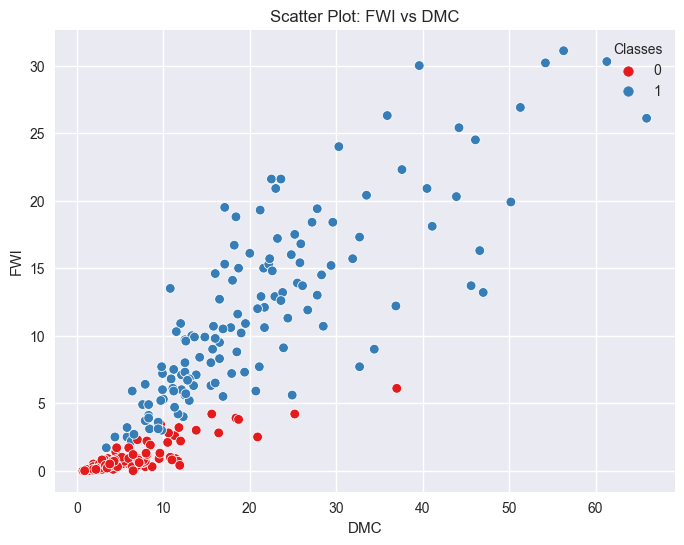

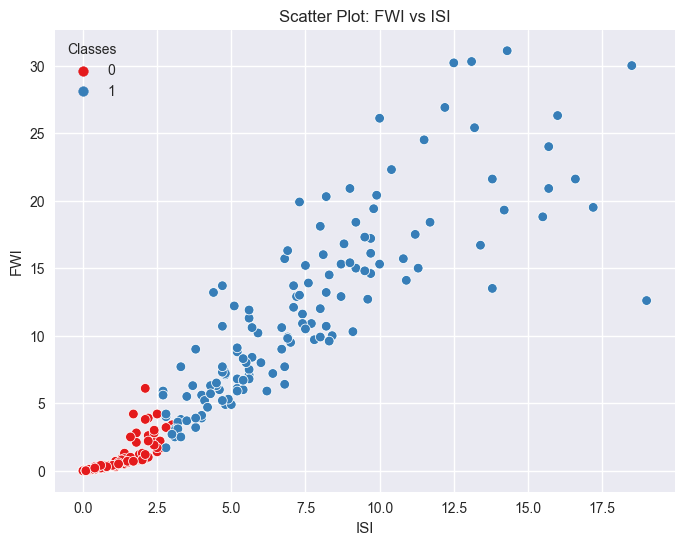

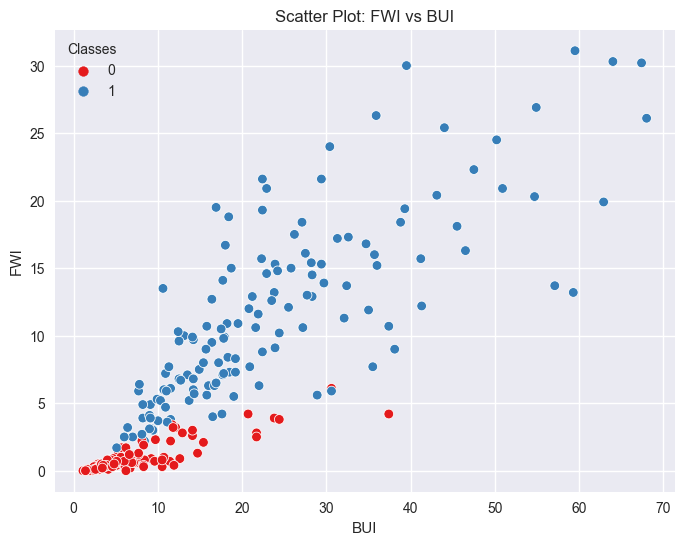

In [26]:
independent_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

# Create scatter plots
for feature in independent_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_copy, x=feature, y='FWI', hue="Classes", palette="Set1")
    plt.title(f"Scatter Plot: FWI vs {feature}")
    plt.show()

In [27]:
# correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.566670,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.580957,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032368,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324422,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691132,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875864,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739521,0.507122,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.922895,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857973,0.583882,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

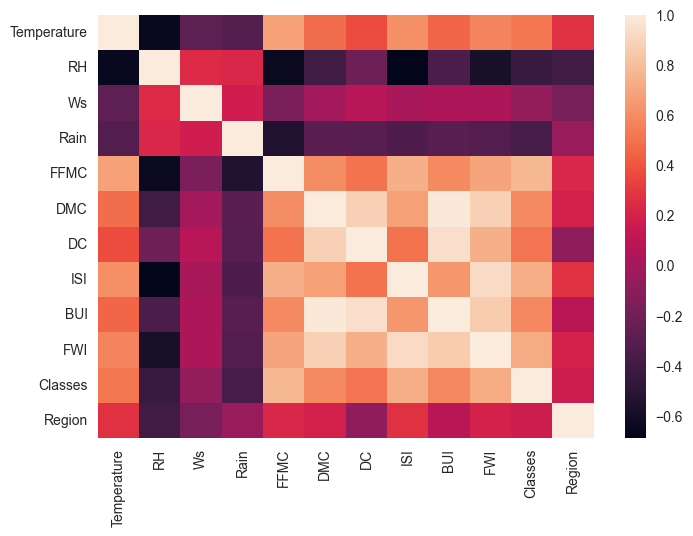

In [28]:
# the lighter the color the more is the correlated towards it 
sns.heatmap(df_copy.corr())

In [29]:
discrete_threshold = 20

continuous_features = []
discrete_features = []

for column in df_copy.columns:
    if df_copy[column].dtype in ['int64', 'float64']:
        unique_vals = df_copy[column].nunique()
        if unique_vals <= discrete_threshold:
            discrete_features.append(column)
        else:
            continuous_features.append(column)
    elif df_copy[column].dtype == 'object':
        discrete_features.append(column)

print("✅ Continuous Features:")
print(continuous_features)
print("\n✅ Discrete Features:")
print(discrete_features)


✅ Continuous Features:
['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

✅ Discrete Features:
['Temperature', 'Ws', 'Classes', 'Region']


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

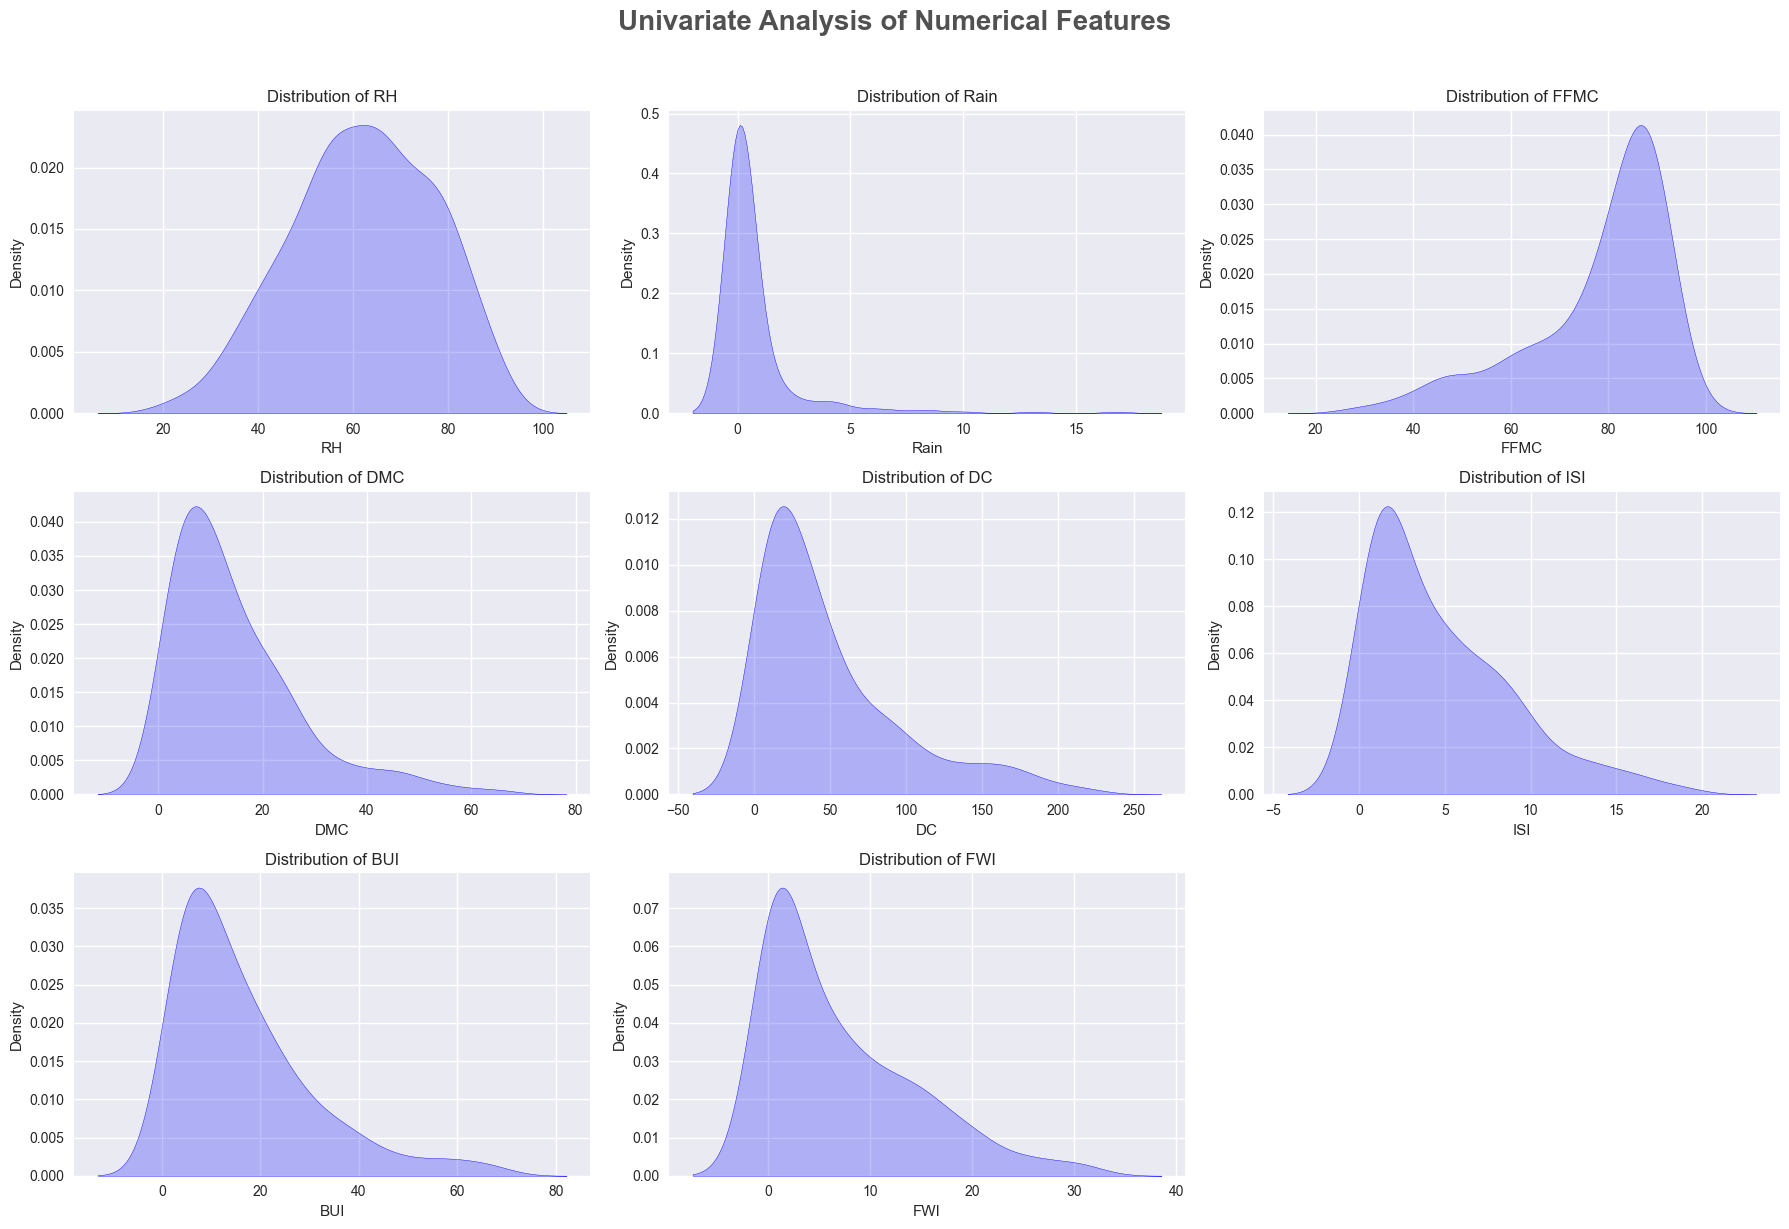

In [30]:
# Univarient analysis of the numerical variables
import math
plt.figure(figsize=(18, 12))
plt.suptitle("Univariate Analysis of Numerical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

# Number of plots
num_features = len(continuous_features)
cols = 3
rows = math.ceil(num_features / cols)

for i, feature in enumerate(continuous_features):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(x=df_copy[feature], color='blue', fill=True)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.tight_layout()

plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


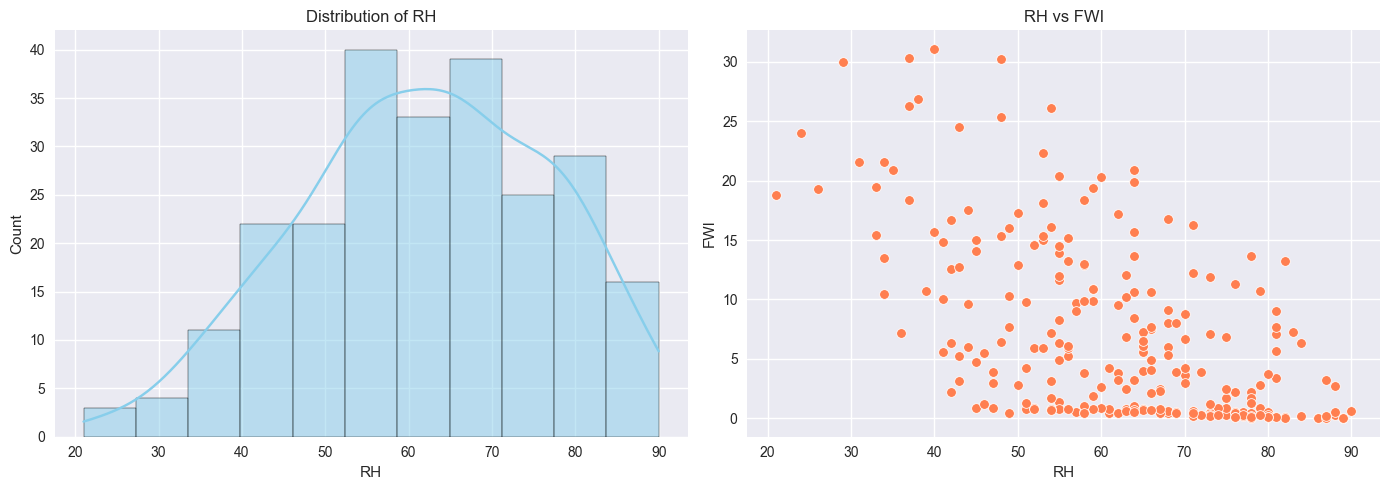

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


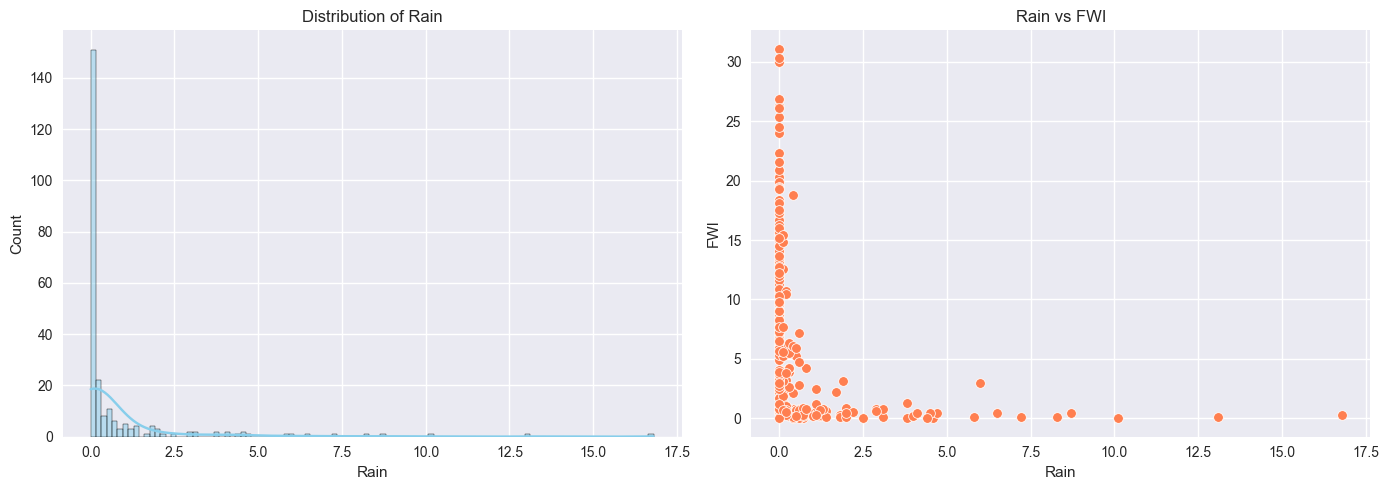

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


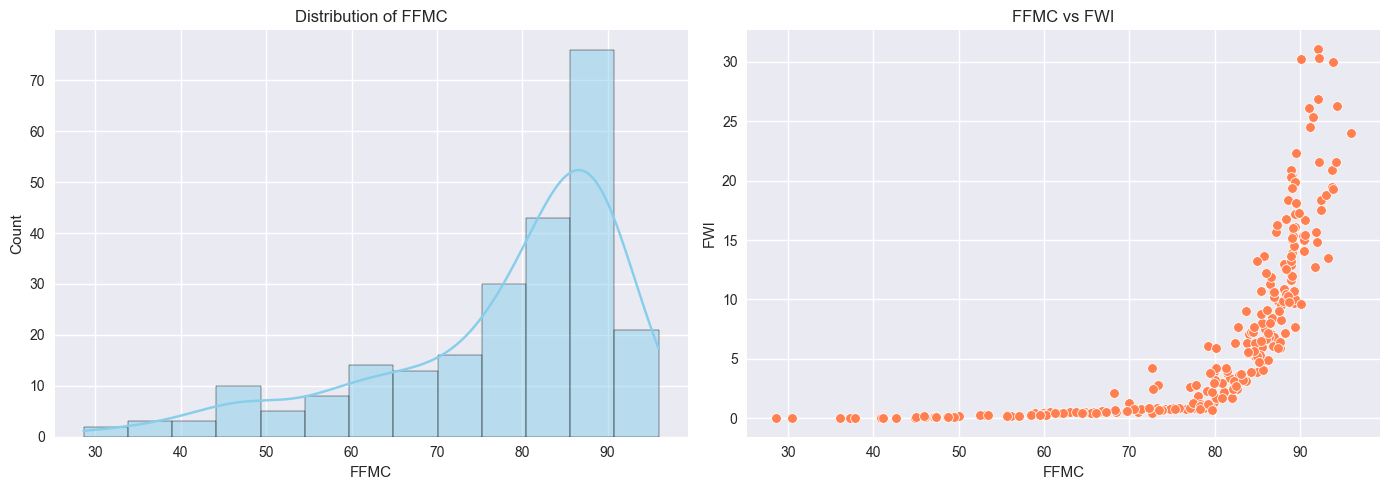

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


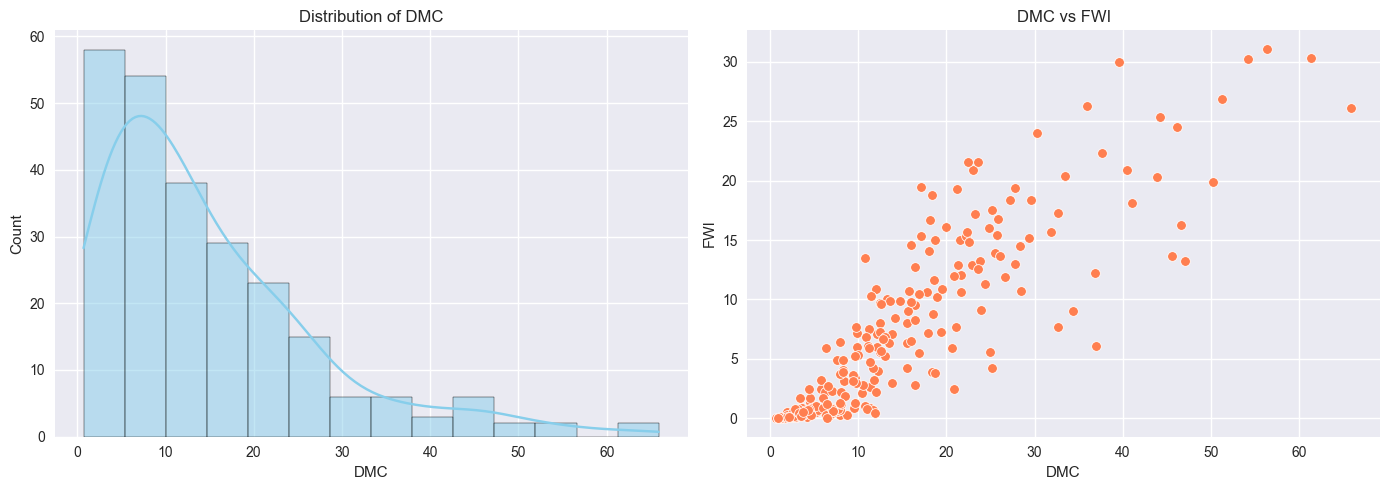

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


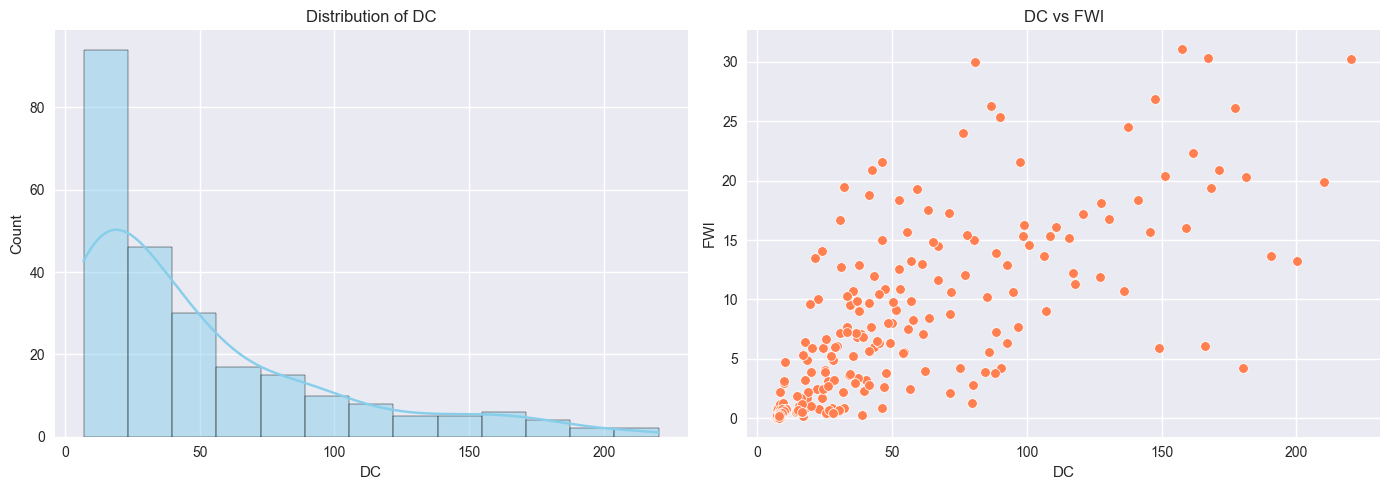

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


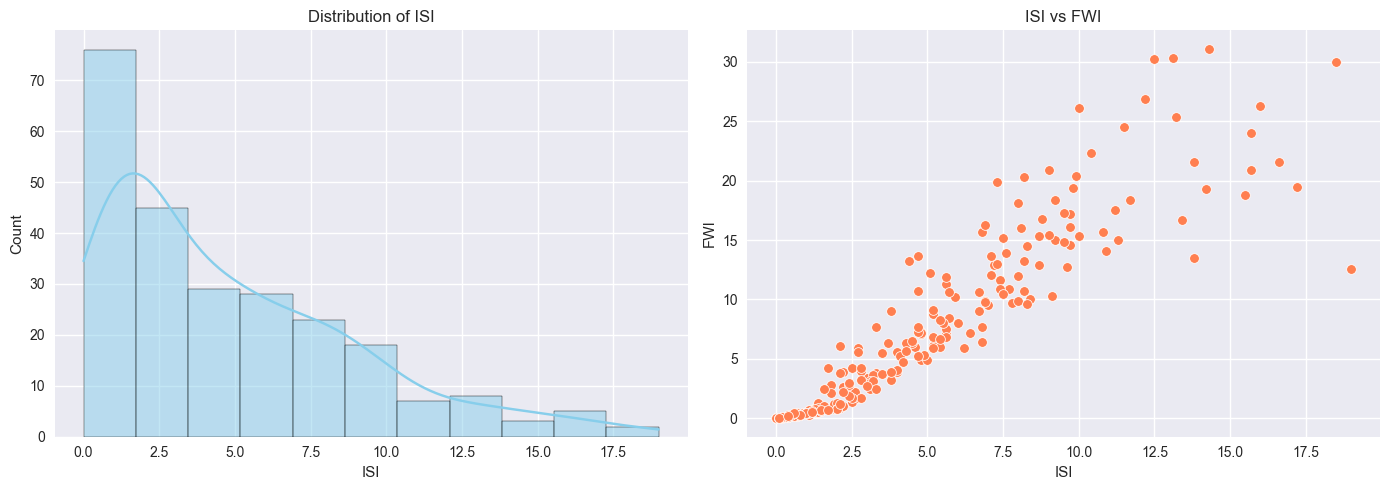

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


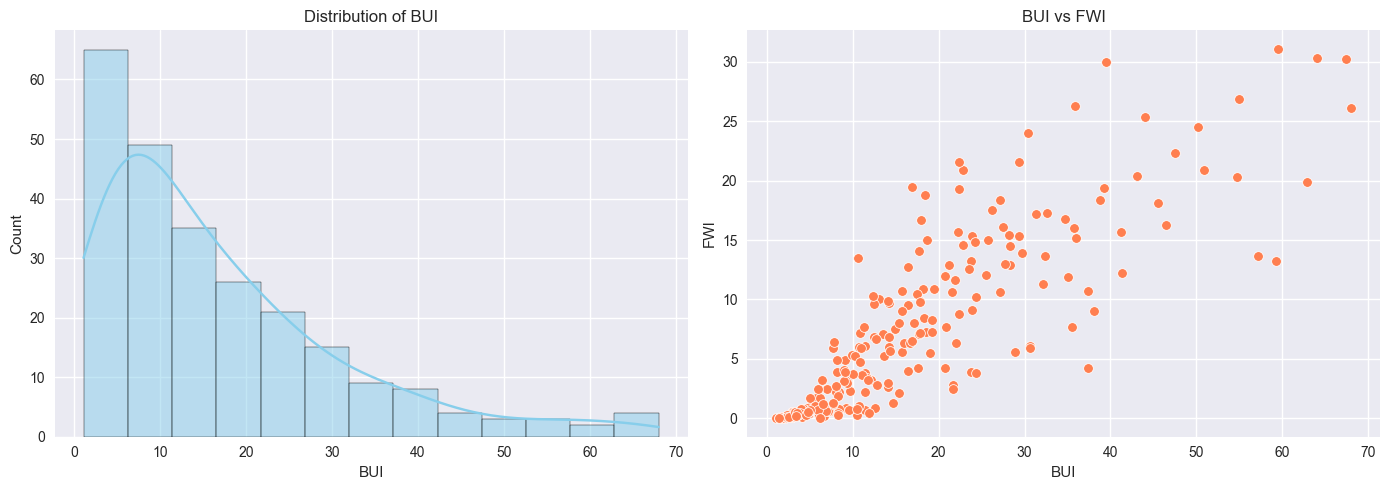

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


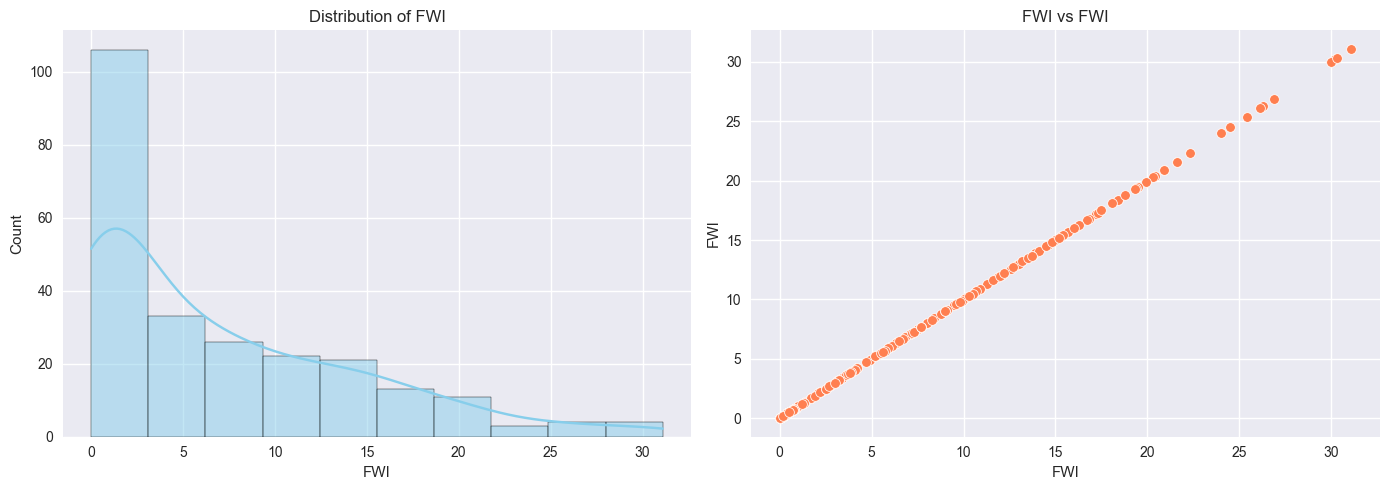

In [31]:
for feature in continuous_features:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')

    # Scatter plot vs FWI
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_copy[feature], y=df_copy['FWI'], color='coral')
    plt.title(f'{feature} vs FWI')

    plt.tight_layout()
    plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

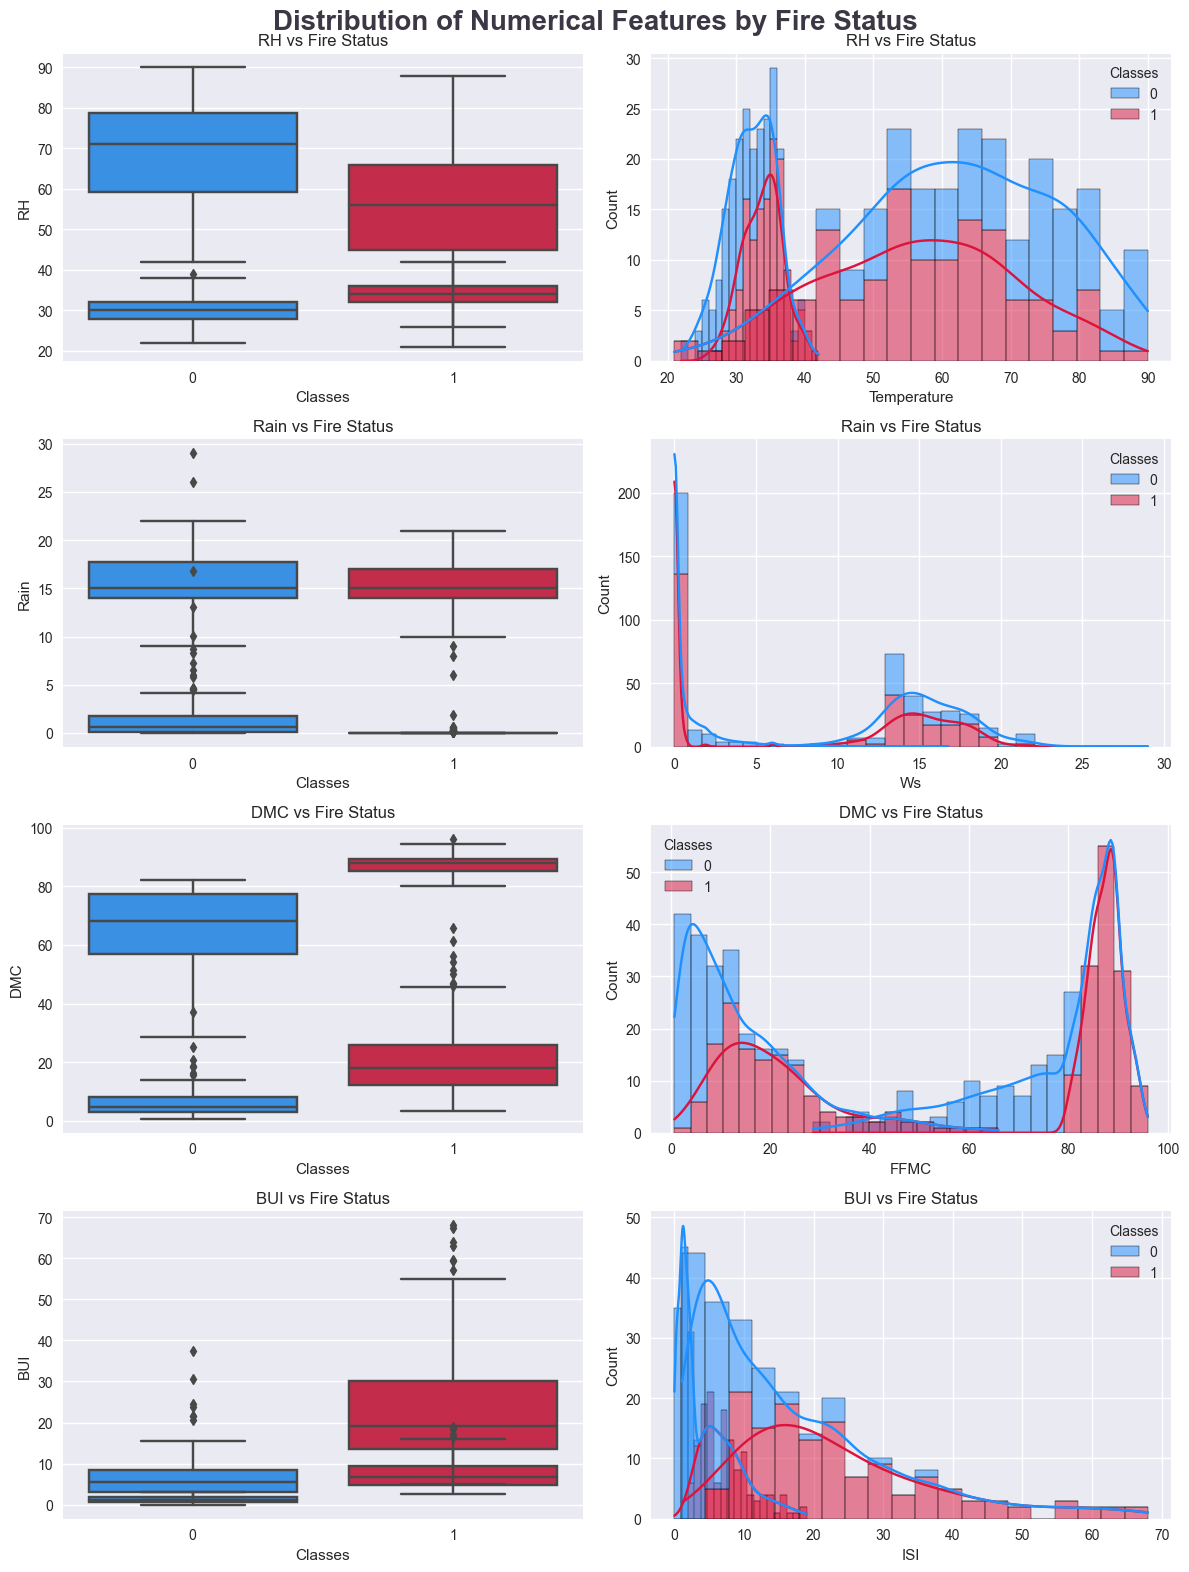

In [32]:
# Here we are checking with the target variable for both the boxplot and the histyplot with the kde and hist plot
clr = ['#1E90FF', '#DC143C']  # Color palette for the two categories (fire vs not fire)
fig, ax = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows, 2 columns grid (to accommodate 8 features)
fig.suptitle("Distribution of Numerical Features by Fire Status", color='#3C3744', 
             fontsize=20, fontweight='bold', ha='center')

# List of continuous features (modify as needed based on your dataset)
continuous_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

# Loop through each continuous feature and plot
for i, feature in enumerate(continuous_features):
    # Left side: Boxplot
    sns.boxplot(data=df_copy, x='Classes', y=feature, palette=clr, ax=ax[i//2, 0])
    ax[i//2, 0].set_title(f'{feature} vs Fire Status')
    
    # Right side: Histplot
    sns.histplot(data=df_copy, x=feature, hue='Classes', bins=20, kde=True, 
                 multiple='stack', palette=clr, ax=ax[i//2, 1])
    ax[i//2, 1].set_title(f'{feature} vs Fire Status')

plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

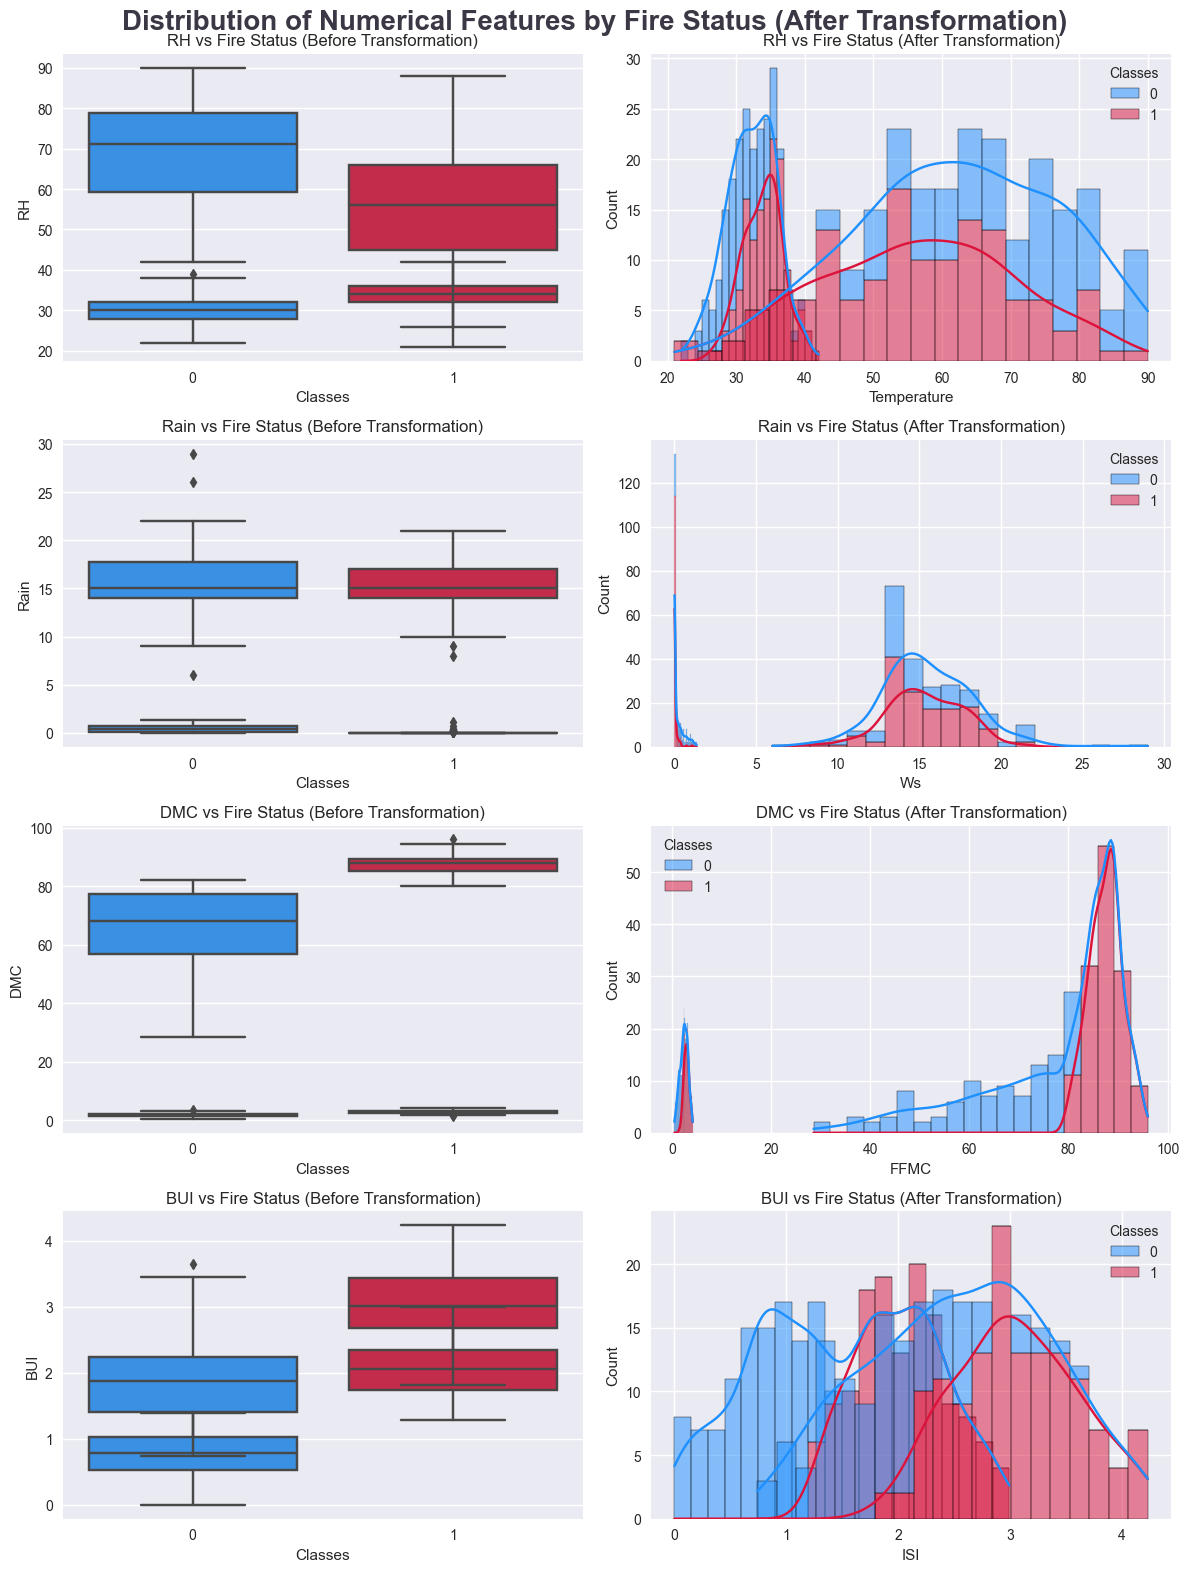

Skewed features and their transformations:
Ws: left skew
Rain: right skew
FFMC: right skew


In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous features
continuous_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

# Function to check and transform skewed features
def transform_skewed_features(df, features, threshold=0.5):
    skewed_features = {}
    # Check skewness for each feature
    for feature in features:
        skew = df[feature].skew()
        if skew > threshold:  # Right-skewed
            skewed_features[feature] = 'right'
            df[feature] = np.log1p(df[feature])  # Apply log transformation
        elif skew < -threshold:  # Left-skewed
            skewed_features[feature] = 'left'
            df[feature] = np.expm1(df[feature])  # Reverse of log (for left skew)
    
    return df, skewed_features

# Apply transformation to continuous features
df_copy, skewed_features = transform_skewed_features(df_copy, continuous_features)

# Visualize the features before and after transformation
clr = ['#1E90FF', '#DC143C']  # Color palette for the two categories (fire vs not fire)
fig, ax = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows, 2 columns grid (to accommodate 8 features)
fig.suptitle("Distribution of Numerical Features by Fire Status (After Transformation)", color='#3C3744', 
             fontsize=20, fontweight='bold', ha='center')

# Loop through each continuous feature and plot before and after transformation
for i, feature in enumerate(continuous_features):
    # Before Transformation
    sns.boxplot(data=df_copy, x='Classes', y=feature, palette=clr, ax=ax[i//2, 0])
    ax[i//2, 0].set_title(f'{feature} vs Fire Status (Before Transformation)')
    
    # After Transformation
    sns.histplot(data=df_copy, x=feature, hue='Classes', bins=20, kde=True, 
                 multiple='stack', palette=clr, ax=ax[i//2, 1])
    ax[i//2, 1].set_title(f'{feature} vs Fire Status (After Transformation)')

plt.tight_layout()
plt.show()

# Print which features were skewed and their transformations
print("Skewed features and their transformations:")
for feature, skew_type in skewed_features.items():
    print(f"{feature}: {skew_type} skew")


In [42]:
import numpy as np

# Apply transformations for skewed features
def transform_skewed_features(df, skewed_features):
    for feature, skew_type in skewed_features.items():
        if skew_type == 'right':
            # Apply log transformation for right-skewed features
            df[feature] = np.log1p(df[feature])
        elif skew_type == 'left':
            # Apply reverse log transformation for left-skewed features
            df[feature] = np.expm1(df[feature])
    
    return df

# List of skewed features and their types
skewed_features = {
    'Ws': 'left',   # Left skew
    'Rain': 'right', # Right skew
    'FFMC': 'right'  # Right skew
}

# Apply transformation to the skewed features
df_copy = transform_skewed_features(df_copy, skewed_features)

# Check skewness after transformation
new_skewness = df_copy[skewed_features.keys()].skew()
print("Skewness after transformation:")
print(new_skewness)


Skewness after transformation:
Ws           NaN
Rain    0.964643
FFMC   -2.025372
dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_13946/3956316965.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False

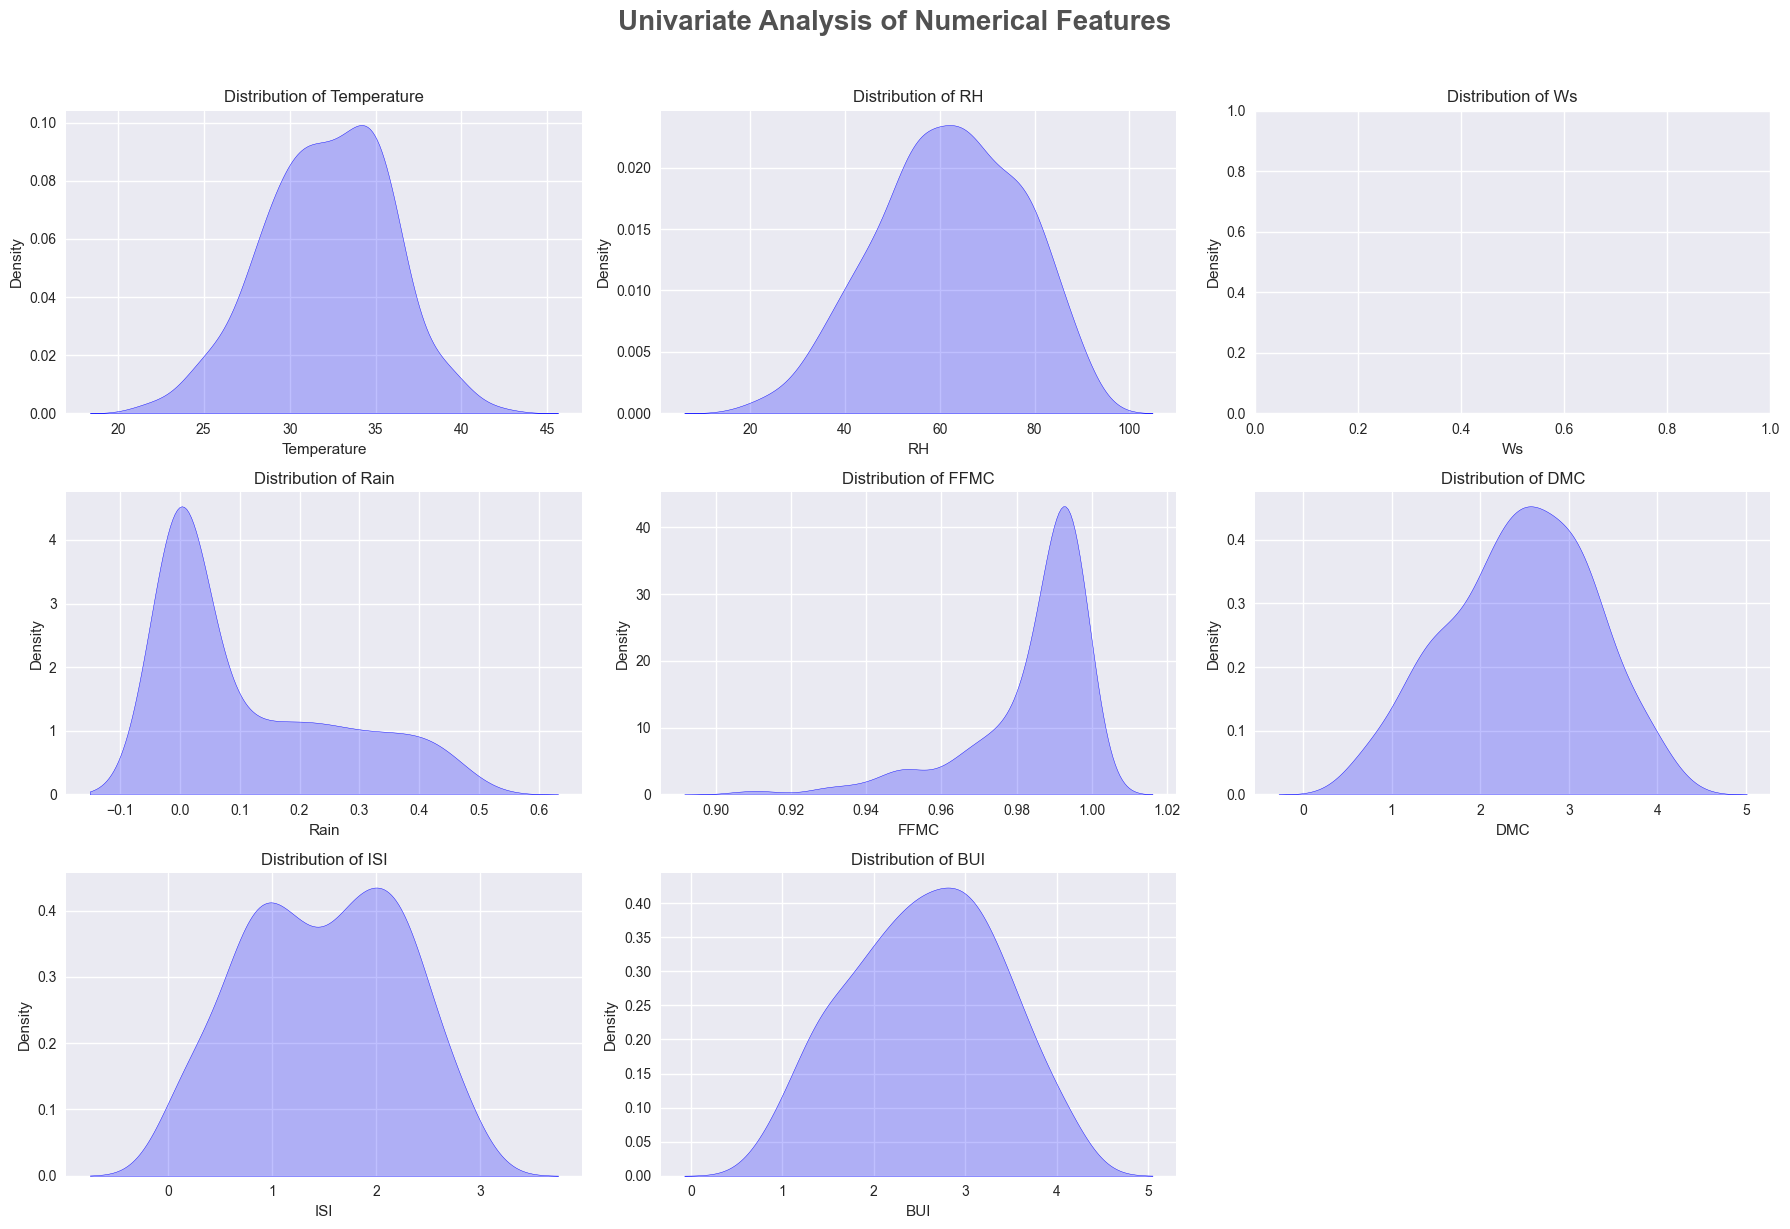

In [44]:
# Univarient analysis of the numerical variables
import math
plt.figure(figsize=(18, 12))
plt.suptitle("Univariate Analysis of Numerical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

# Number of plots
num_features = len(continuous_features)
cols = 3
rows = math.ceil(num_features / cols)

for i, feature in enumerate(continuous_features):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(x=df_copy[feature], color='blue', fill=True)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.tight_layout()

plt.show()


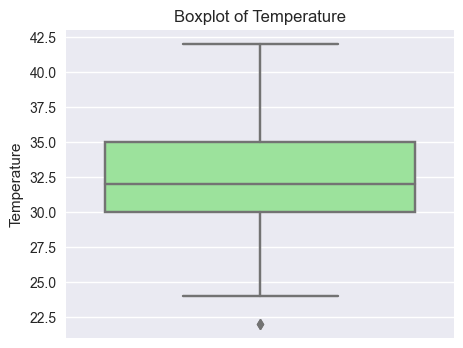

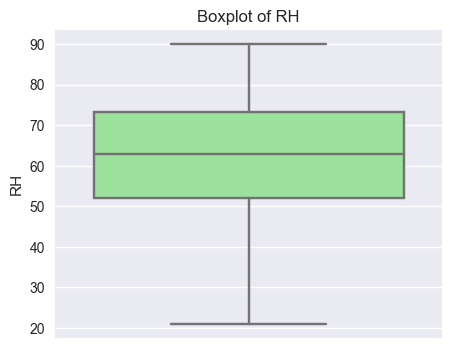

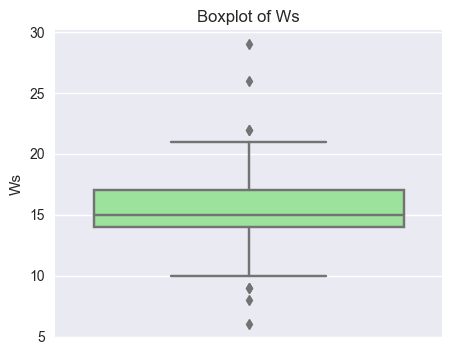

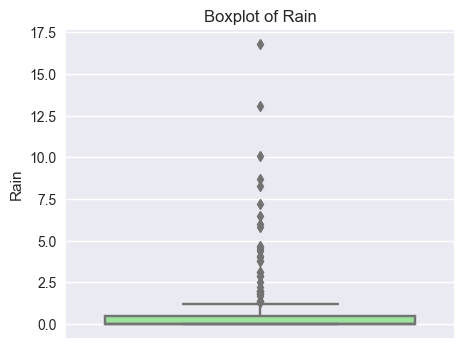

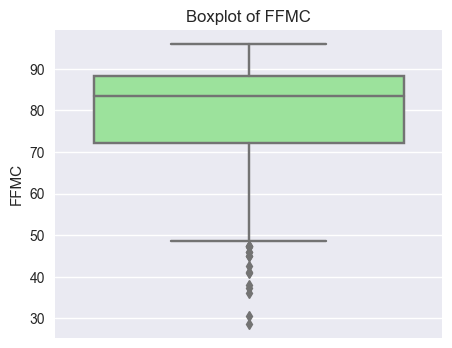

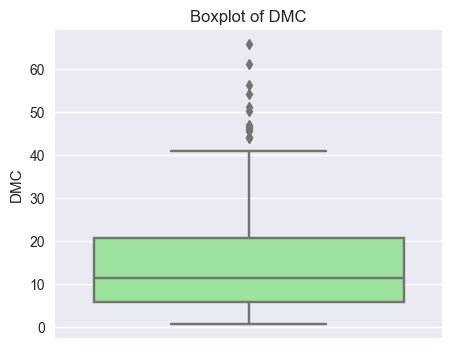

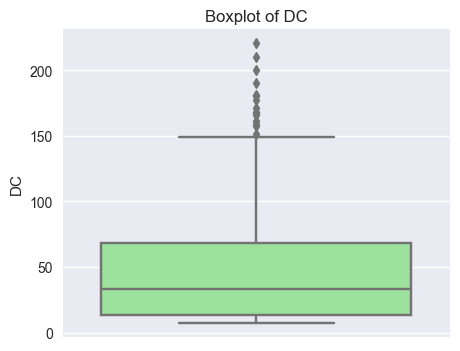

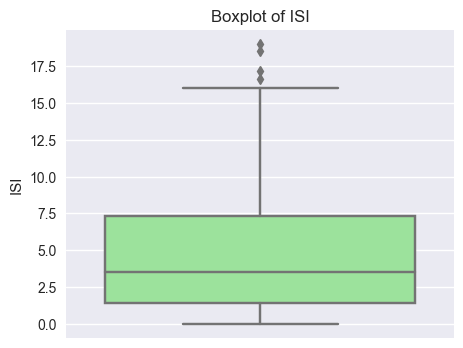

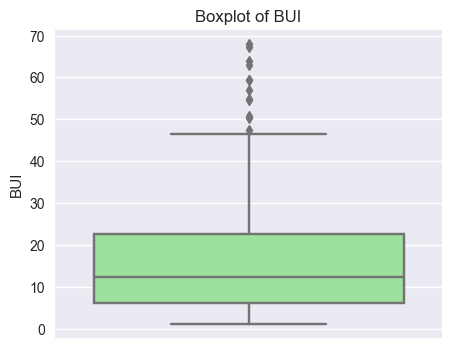

In [33]:
# boxplot for understanding is there any outliers present in it

features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

for feature in features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df_copy[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [45]:
# Calculate Q1, Q3 and IQR for each continuous feature
Q1 = df_copy[continuous_features].quantile(0.25)
Q3 = df_copy[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df_copy[~((df_copy[continuous_features] < lower_bound) | (df_copy[continuous_features] > upper_bound)).any(axis=1)]

# Check the shape before and after removing outliers
print(f"Original data shape: {df_copy.shape}")
print(f"Data shape after removing outliers: {df_no_outliers.shape}")


Original data shape: (244, 12)
Data shape after removing outliers: (221, 12)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


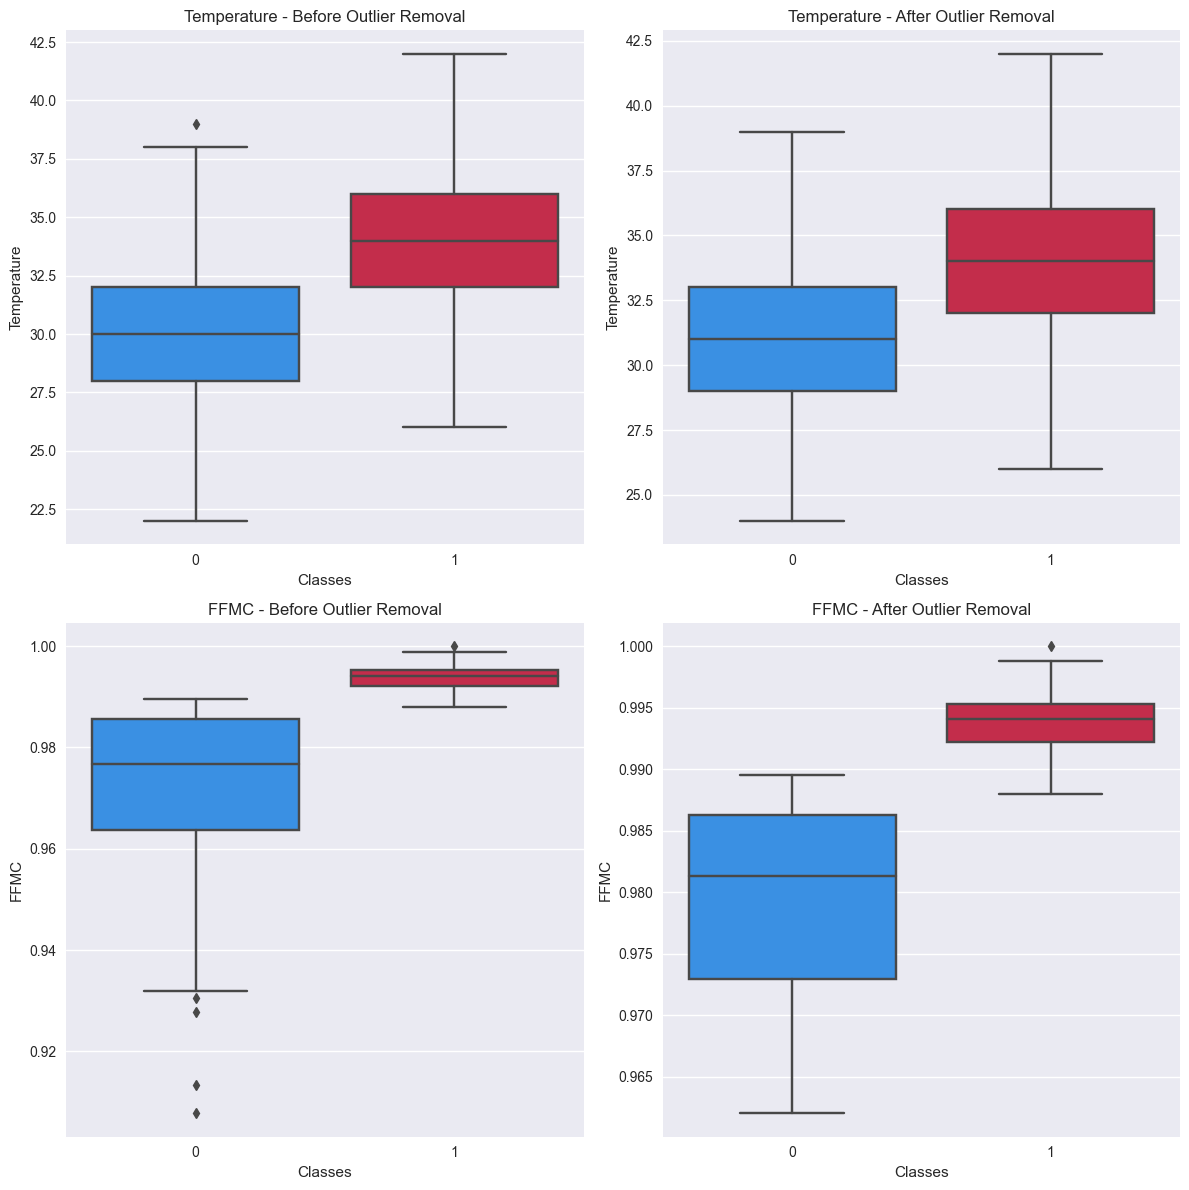

In [52]:
# Before and After Removal of the dataset
import matplotlib.pyplot as plt
import seaborn as sns

clr = ['#1E90FF', '#DC143C']  # Color palette for the two categories (fire vs not fire)

# Create subplots for boxplots before and after outlier removal
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot for 'Temperature' before and after outlier removal
sns.boxplot(data=df_copy, x='Classes', y='Temperature', ax=ax[0, 0], palette=clr)
ax[0, 0].set_title('Temperature - Before Outlier Removal')
sns.boxplot(data=df_no_outliers, x='Classes', y='Temperature', ax=ax[0, 1], palette=clr)
ax[0, 1].set_title('Temperature - After Outlier Removal')

# Plot for 'FFMC' before and after outlier removal
sns.boxplot(data=df_copy, x='Classes', y='FFMC', ax=ax[1, 0], palette=clr)
ax[1, 0].set_title('FFMC - Before Outlier Removal')
sns.boxplot(data=df_no_outliers, x='Classes', y='FFMC', ax=ax[1, 1], palette=clr)
ax[1, 1].set_title('FFMC - After Outlier Removal')

plt.tight_layout()
plt.show()


In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')